# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Главная цель исследования** - найти такие характеристики недвижимости, которые больше всего влияют на её стоимость.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Главная-цель-исследования" data-toc-modified-id="Главная-цель-исследования-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Главная цель исследования</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных.-Вывод" data-toc-modified-id="Предобработка-данных.-Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобработка данных. Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Расчеты-и-добавление-результатов.-Вывод." data-toc-modified-id="Расчеты-и-добавление-результатов.-Вывод.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчеты и добавление результатов. Вывод.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-площадь" data-toc-modified-id="Изучим-площадь-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим площадь</a></span></li><li><span><a href="#Изучим-время-продажи-квартиры." data-toc-modified-id="Изучим-время-продажи-квартиры.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим время продажи квартиры.</a></span></li><li><span><a href="#Уберем-редкие-и-выбивающиеся-значения" data-toc-modified-id="Уберем-редкие-и-выбивающиеся-значения-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уберем редкие и выбивающиеся значения</a></span></li><li><span><a href="#Столбцы-с-&quot;подозрительными&quot;-данными" data-toc-modified-id="Столбцы-с-&quot;подозрительными&quot;-данными-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Столбцы с "подозрительными" данными</a></span></li><li><span><a href="#Вывод-по-редким-значениям" data-toc-modified-id="Вывод-по-редким-значениям-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод по редким значениям</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартир?" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартир?-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартир?</a></span></li><li><span><a href="#Добавим-категории-стоимости-квартир" data-toc-modified-id="Добавим-категории-стоимости-квартир-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Добавим категории стоимости квартир</a></span></li><li><span><a href="#Выберем-10-населённых-пунктов" data-toc-modified-id="Выберем-10-населённых-пунктов-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Выберем 10 населённых пунктов</a></span></li><li><span><a href="#Изучим-предложения-квартир" data-toc-modified-id="Изучим-предложения-квартир-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Изучим предложения квартир</a></span></li><li><span><a href="#Выделим-сегмент-квартир-в-центре" data-toc-modified-id="Выделим-сегмент-квартир-в-центре-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Выделим сегмент квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
# загружаем библиотеку pandas
import pandas as pd

# получение названия файла БД при загрузке
import os

# загружаем библиотеку matplotlib
import matplotlib.pyplot as plt

In [2]:
# загрузка БД с сервера или ПК
# attempt_1 - путь и название файла для загрузки с сервера
# attempt_2 - путь и название файла для загрузки с ПК

attempt_1 ='https://code.s3.yandex.net/datasets/real_estate_data.csv'
attempt_2 ='C://yandex_data_sets/02_real_estate_data.csv'

# берем название файла из указанного пути
name_os_data = os.path.basename(attempt_1)
print('File name:',name_os_data)

# обработка ошибок при загрузке
try:
    df = pd.read_csv(attempt_1, sep='\t')
    print(name_os_data, 'has been downloaded from the server')
except:
    print('Server error')
try:
    df = pd.read_csv(attempt_2, sep='\t')
    print(name_os_data, 'has been downloaded from local host')
except:
    print('Local Error')



File name: real_estate_data.csv
real_estate_data.csv has been downloaded from the server
real_estate_data.csv has been downloaded from local host


In [3]:
# выводим заголовок
display(df.head(3))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [4]:
# выводим информацию о таблице
df.info()
#print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
# перечень названий столбцов таблицы df
#df.columns.tolist()
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# подсчёт пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Главная цель исследования

Найти такие характеристики недвижимости, которые больше всего влияют на её стоимость.

### Вывод

1. В названиях колонок есть нарушение стиля: строчные буквы сочетаются с прописными.
2. В данных есть пропущенные значения требующие обработки.
3. На первый взгляд в данных нет значений указывающих на кретические ошибки, непозволяющие проводить исследование и требующих уточнений.
4. total_area (общая площадь квартиры) имеет 0 пропусков, в то время как living_area (жилая площадь) 1903 пропуска, пропущенные данные составляют 8%, т.к. данные "общая площадь" имеют близкое значение к "жилой площади" и будут иметь более точное значение чем медианное или среднее, возьмет эти данные оттуда.
5. Данные о прудах и парках. В 'ponds_nearest' имеется 14589 пропусков, в 'parks_nearest' 15620 пропусков. Количество этих пропусков почти в три раза больше чем пропусков в 'ponds_around3000' и 'parks_around3000', это означает, что фактически пруды и парки есть, но расстояние до них не указывается. В целом экологическая тематика, достаточно важна при выборе недвижимости и возможно именно эти данные могут иметь критическую важность при выборе недвижимости и в конечном счете сильно влиять на другие показатели, например на скорость покупки. Конечно покупка недвижимости это не выбор отеля, где указано расстояние до пляжа, но в целом наличие этих пропусков в столь большом количестве - это повод для обсуждения.
6. Данные  об апартаментах 'is_apartment' практически отсутсвуют, т.к. имеется 20924 пропуска (88%) при этом наличие таких данных как 'False' в этой строке говорит о том, что здесь данных должны были храниться логически, можно предположить о какой-то ошибке при обработке данных.
7. Данные в 'floors_total', 'balcony', 'ponds_nearest', 'parks_nearest' заменим на целочисленные (int64) т.к. эти данные могут быть только целыми.
8. Проверим данные на возможные отрицательные значения, логично предположить, что подобные данные должны отсутсвовать.
9. Проверим явные дубликаты.

## Предобработка данных

1. Переименуем столбец 'cityCenters_nearest'
2. Заполним пустые значения 'balcony' нулевыми значениями. Будем исходить из предположения, что в пропущенных данных просто не было указано количество т.к. балкона небыло.
3. Заполним пустые значения 'locality_name'. Воспользуемся методом groupby для группировки значений и поиска самого популярного значения, т.к. пропущенных строк всего 49 (0.2%) то этими данными можно пренебречь и заполнить для удобства дальнейшей работы.

In [7]:
# переименуем 'cityCenters_nearest'
df = df.rename(columns={'cityCenters_nearest': 'city_сenter_nearest'})

# заполним значения 'balcony' нулевыми значениями
df['balcony'] = df['balcony'].fillna(value=0)

# найдем самое популярно значение для 'locality_name'
data_grouped = df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False)
display(data_grouped)

# заполним пустые значения 'locality_name' самым популярным значением Санкт-Петербург
df['locality_name'] = df['locality_name'].fillna('Санкт-Петербург')

locality_name
Санкт-Петербург       15721
посёлок Мурино          522
посёлок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
поселок Каложицы          1
поселок Кирпичное         1
поселок Коммунары         1
поселок Коробицыно        1
село Шум                  1
Name: locality_name, Length: 364, dtype: int64

In [8]:
# проверим внесенные изменения: city_сenter_nearest, balcony, locality_name
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

4. Заменим пустые значения: ceiling_height. Для этого рассмотрим гистограмму среднее, медианное, максимальное и минимальное значения.

Среднее значение 2.7714988968559835
Медианное значение 2.65
Минимальное значение 1.0
Максимальное значение 100.0
AxesSubplot(0.125,0.125;0.775x0.755)


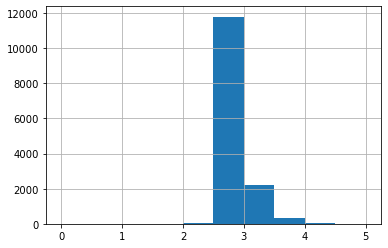

In [9]:
print('Среднее значение', df['ceiling_height'].mean())
print('Медианное значение', df['ceiling_height'].median())
print('Минимальное значение', df['ceiling_height'].min())
print('Максимальное значение', df['ceiling_height'].max())

#df.plot(kind='ceiling_height', alpha=0.3)
#alpha=0.3 - отвечает за прозрачность

# рассмотрим гистограмму для ceiling_height - высота потолков
print(df['ceiling_height'].hist(range=(0, 5)))


5. Из приведенных данных видно, что для заполнения пустых значений лучше воспользоваться средним значением.
Заполним данные высота потолка 'ceiling_height' средним значением.

In [10]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())

6. Заполним пустые данные для days_exposition - длительность размещения, рассмотрим медианное и среднее значения.

AxesSubplot(0.125,0.125;0.775x0.755)


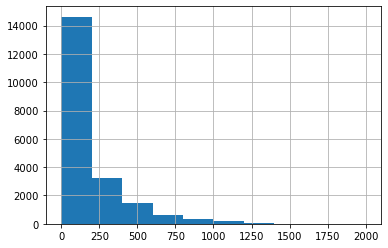

In [11]:
# рассмотрим гистограмму для days_exposition - длительность размещения
print(df['days_exposition'].hist(range=(0, 2000)))

In [12]:
# рассмотрим разные значения для длительности размещения объявления
print('Среднее значение', df['days_exposition'].mean())
print('Медианное значение', df['days_exposition'].median())
print('Минимальное значение', df['days_exposition'].min())
print('Максимальное значение', df['days_exposition'].max())

Среднее значение 180.88863436982163
Медианное значение 95.0
Минимальное значение 1.0
Максимальное значение 1580.0


Из приведенных данных видно, что для заполнения пустых значений лучше воспользоваться средним значением. Заполним данные высота потолка 'days_exposition' (длительность размещения) средним значением.

In [13]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].mean())

7. Заполним пустые значения жилая площадь. total_area (общая площадь квартиры) имеет 0 пропусков, в то время как living_area (жилая площадь) 1903 пропуска возьмем недостающие данные из total_area  и проверим внесенные изменения в

ceiling_height, days_exposition, total_area.

In [14]:
# обработка total_area
df['living_area'] = df['living_area'].fillna(df['total_area'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [15]:
# подсчёт пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_сenter_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

In [16]:
# просмотрим уникальные значений для is_apartment (апартаменты)
# мы видим 20924 пропуска это 88%
is_apartment_sorted = (sorted(df['is_apartment'].unique()))
for index in is_apartment_sorted:
    print(index)                        

nan
False
True


8. is_apartment (апартаменты). Из приведенных выше данных видим что основная часть данных отсутсвует, однако есть логические данны о том, является недвижимость аппартаментами или нет. Исходя из того, что аппартаменты являются достаточно большой редкостью при покупке/продаже недвижимости можно предположить, что все отсутсвующие данные это не аппартаменты, однако исходя из того, что пропусков слишком много заменять эти данные на False не будем, т.к. это приведет к слишком большому искажению и полной потери актуальности имеющихся данных.

9. Заполним пустые значения: floors_total, kitchen_area, airports_nearest, city_сenter_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest медианными значениями. Исходя из того, что количество пропусков порядка 20% не будем уделять обработке этих пропусков слишком много времения. Если окажется, что эти характеристики имеют ключевое значение, можно будет провести дополнительное исследование с более детальной обработкой этих данных.

In [17]:
columns_to_replace_median = ['floors_total', 'kitchen_area', 'airports_nearest',
                             'city_сenter_nearest', 'parks_around3000', 'parks_nearest',
                             'ponds_around3000', 'ponds_nearest']

count_column_median = 0            # количество измеренний
wrong_column_median = 0            # количество неверных значений
wrong_column_content_median = []   # пустой список для неверных значений 

for column in columns_to_replace_median:
    try:
        # перебор названий столбцов в цикле расчет медианы
        median_index = df[column].median()
        df[column] = df[column].fillna(value=median_index)
        count_column_median += 1
    except:
        wrong_column_content_median.append(column)
        wrong_column_median +=1 

print('Количество изменений', count_column_median )
print('Некорректные строки', wrong_column_content_median)
print('Количество некорректных строк', wrong_column_median)
if  wrong_column_median == 0:
    print('Указанные данные успешно заменены на медианные!')


Количество изменений 8
Некорректные строки []
Количество некорректных строк 0
Указанные данные успешно заменены на медианные!


In [18]:
# проверка всех внесенных изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

10. Из приведенных выше данных видно, что 'floors_total' (все этажей), 'balcony' (балконы), 'days_exposition'(длительность продажи), 'ponds_nearest' (пруды поблизости), 'parks_nearest' (парки попблизости)
Должны иметь только целые значения, заменим их тип на целочисленный.

In [19]:
# заменим вещественный тип данных на целочисленный

columns_to_replace_int = ['floors_total', 'balcony', 'days_exposition', 'ponds_nearest', 'parks_nearest']

count_column_int = 0            # количество измеренний
wrong_column_int = 0            # количество неверных значений
wrong_column_content_int = []   # пустой список для неверных значений 

for column in columns_to_replace_int:
    try:
        # перебор названий столбцов в цикле и замена типа на int
        df[column] = df[column].astype('int')
        count_column_int += 1
    except:
        wrong_column_content_int.append(column)
        wrong_column_int +=1 

print('Количество изменений', count_column_int )
print('Некорректные строки', wrong_column_content_int)
print('Количество некорректных строк', wrong_column_int)
if  wrong_column_int == 0:
    print('Указанные данные успешно заменены на целочисленные!')

Количество изменений 5
Некорректные строки []
Количество некорректных строк 0
Указанные данные успешно заменены на целочисленные!


In [20]:
# проверка всех внесенных изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int32  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int32  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [21]:
# проверим данные на отрицательные значения
columns_to_zero = ['total_images', 'last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony',
       'airports_nearest', 'city_сenter_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']

count_column_zero = 0            # количество измеренний
wrong_column_zero = 0            # количество значений меньше нуля
wrong_column_content_zero = []   # пустой список для неверных значений 

for column in columns_to_zero:
    try:
        # проверка отрицательных значений
        columns_to_zero = df[df[column] < 0]
        count_column_zero += 1
    except:
        wrong_column_content_zero.append(column)
        wrong_column_zero +=1 
print('Количество измерений', count_column_zero )
print('Некорректные строки', wrong_column_content_zero)
print('Количество некорректных строк', wrong_column_zero)
if  wrong_column_zero == 0:
    print('Отрицательных значений не обнаружено!')

Количество измерений 17
Некорректные строки []
Количество некорректных строк 0
Отрицательных значений не обнаружено!


In [22]:
# проверка явных дубликатов
display(df.duplicated().sum())

0

### Предобработка данных. Вывод

В данных нет критических замечений, все исходные данные проверены и обработаны, готовы для дальнейшего анализа.
При проведении анализ необходимо учитывать только тот факт, что данные об апартаментах (is_apartment) практически отсутсвуют, есть только 12% доставерных данных. Если эти даные будут критичными для полученных данных то необходимо будет проводить дополнительный анализ, после уточнения этих данных.

## Расчёты и добавление результатов в таблицу

In [23]:
# Расчитаем и добавим в таблицу цену квадратного метра - last_price_square_meter это отношение двух величин
# Для этого воспользуемся значениями из last_price (цена на момент продажи) и total_area (общая площадь)

df['last_price_square_meter'] = df['last_price'] / df['total_area']
display(df['last_price_square_meter'].head())

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: last_price_square_meter, dtype: float64

In [24]:
# Добавим новые данные: день недели, месяц и год публикации объявления;
# Воспользуемся методом to_datetime()
# Названия новых столбцов weekday - день недели, month - месяц, year - год

df['weekday'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M').dt.weekday
print(df['weekday'].head(5))

df['month'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M').dt.month
print(df['month'].head(5))

df['year'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M').dt.year
print(df['year'].head(5))


0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64
0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64
0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64


In [25]:
# создадим новый столбец floor_category
# добавим в него новые данные этаж квартиры; варианты — первый, последний, другой;
# для этого воспользуемся функцией floor_group
# Пройдем по всем этажам квартиры, при этом 
# первый этаж - 'min' это минимальное значение
# последний этаж - это значение равное значению в floors_total (всего этажей)

# Для начала найдем минимальное значение
floor_min = df['floor'].min()
print('Минимальное значение', floor_min)

# создадим функцию, floor_group которая будет принимать новое значение на основе входящих данных
# новое значение - группа, входящие данные - всего этажей
def floor_group(income_index):
    
    if income_index == floor_min:
        return 'первый'
    if income_index == df.loc[income_index, 'floors_total']:
        return 'последний'

    return 'другой' 

# print(df.loc[test, 'floors_total']) - обращение к одной ячейки
# создадим новый столбец в который поместим результат работы функции
# функция проходим по значения столбца 'floor'
df['floor_category'] = df['floor'].apply(floor_group)

# для проверки выведем заголовок измененной таблицы
display(df.head())
# для проверки посчитаем количество строк по каждой категории дохода
display(df['floor_category'].value_counts())

Минимальное значение 1


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_square_meter,weekday,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16,51.0,8,NaN,...,1.0,482,2.0,755,180,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11,18.6,1,NaN,...,0.0,455,0.0,502,81,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5,34.3,4,NaN,...,1.0,90,2.0,574,558,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.771499,14,159.0,9,NaN,...,2.0,84,3.0,234,424,408176.100629,4,7,2015,последний
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14,32.0,13,NaN,...,2.0,112,1.0,48,121,100000.000000,1,6,2018,другой


другой       19504
первый        2917
последний     1278
Name: floor_category, dtype: int64

Расчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [26]:
# Расчитаем и добавим в таблицу соотношение 
# жилой площади living_area 
# общей площади total_area
df['living_total_area'] = df['living_area'] / df['total_area']
display(df['living_total_area'].head())

# Расчитаем и добавим в таблицу соотношение 
# площади кухни kitchen_area
# общей площади total_area
df['kitchen_total_area'] = df['kitchen_area'] / df['total_area']
display(df[['living_total_area', 'kitchen_total_area']].head())

0    0.472222
1    0.460396
2    0.612500
3    1.000000
4    0.320000
Name: living_total_area, dtype: float64

,living_total_area,kitchen_total_area
0,0.472222,0.231481
1,0.460396,0.272277
2,0.612500,0.148214
3,1.000000,0.057233
4,0.320000,0.410000


### Расчеты и добавление результатов. Вывод.

Данные: день недели, месяц и год публикации объявления добавлены отдельным столбцом, возможно это несовсем корректно с точки зрения структуры данных


## Исследовательский анализ данных

### Изучим площадь

1. Изучим следующие параметры: 
площадь, цена, число комнат, высота потолков. Построем гистограммы для каждого параметра.

Минимальное значение 12.0
Максимальное значение 900.0
AxesSubplot(0.125,0.125;0.775x0.755)


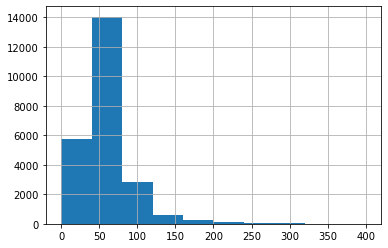

In [27]:
# рассмотрим гистограмму для total_area - площадь
print('Минимальное значение', df['total_area'].min())
print('Максимальное значение', df['total_area'].max())
print(df['total_area'].hist(range=(0, 400)))

Минимальное значение 12190.0
Максимальное значение 763000000.0
AxesSubplot(0.125,0.125;0.775x0.755)


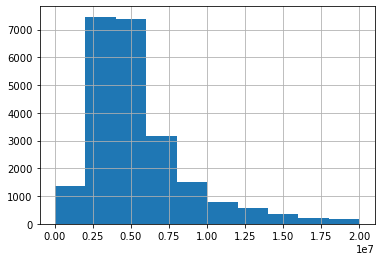

In [28]:
# рассмотрим гистограмму для last_price - цена
print('Минимальное значение', df['last_price'].min())
print('Максимальное значение', df['last_price'].max())
print(df['last_price'].hist(range=(0, 20000000)))

Минимальное значение 0
Максимальное значение 19
AxesSubplot(0.125,0.125;0.775x0.755)


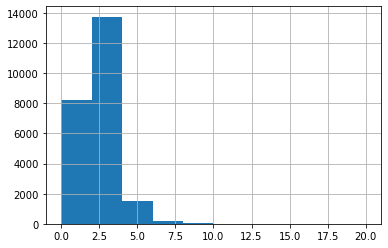

In [29]:
# рассмотрим гистограмму для rooms - число комнат
print('Минимальное значение', df['rooms'].min())
print('Максимальное значение', df['rooms'].max())
print(df['rooms'].hist(range=(0, 20)))

Минимальное значение 1.0
Максимальное значение 100.0
AxesSubplot(0.125,0.125;0.775x0.755)


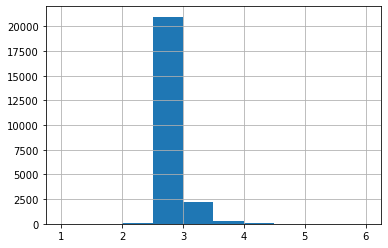

In [30]:
# рассмотрим гистограмму для ceiling_height - высота потолков
print('Минимальное значение', df['ceiling_height'].min())
print('Максимальное значение', df['ceiling_height'].max())
print(df['ceiling_height'].hist(range=(1, 6)))

### Изучим время продажи квартиры.

2. Изучим время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Среднее значение 180.7693573568505
Медианное значение 124.0
Минимальное значение 1
Максимальное значение 1580
AxesSubplot(0.125,0.125;0.775x0.755)


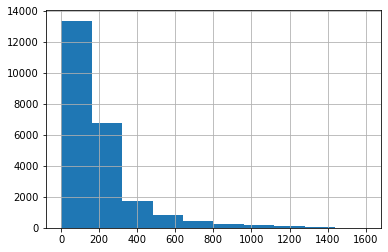

In [31]:
# рассмотрим разные значения для длительности размещения объявления
print('Среднее значение', df['days_exposition'].mean())
print('Медианное значение', df['days_exposition'].median())
print('Минимальное значение', df['days_exposition'].min())
print('Максимальное значение', df['days_exposition'].max())
print(df['days_exposition'].hist(range=(1, 1600)))

AxesSubplot(0.125,0.125;0.775x0.755)


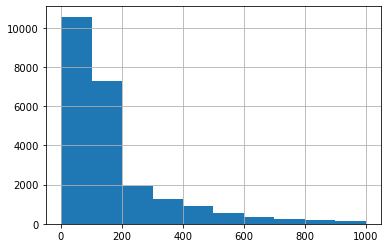

In [32]:
print(df['days_exposition'].hist(range=(1, 1000)))

AxesSubplot(0.125,0.125;0.775x0.755)


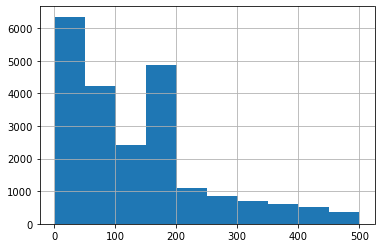

In [33]:
print(df['days_exposition'].hist(range=(1, 500)))

AxesSubplot(0.125,0.125;0.775x0.755)


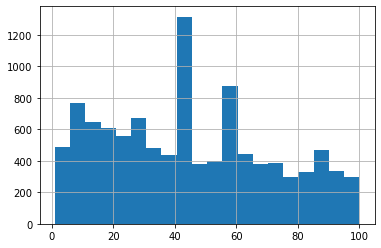

In [34]:
print(df['days_exposition'].hist(bins=20, range=(1, 100)))

Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
Из приведенных данных и графиков видно, что в среднем квартира продается 180 дней, это меньше медианного значения 120 дней исходя из графика, видно, что 180 дней примерно соответсвует второму всплеску продаваемости квартир.
Из графиков хорошо видно, что основные продажи квартир приходятся на первые дни продаж.
Можно сказать, что есть два пика продаж - первый с начала продаж до 70 лней и второй от 160 дней до 200 дней.
Дальше длительность продаж планомерно падает.

Максимальный срок продажи 1580 дней, это больше 4,5 лет безусловно это очень длительный срок, но нельзя сказать что эта дата является аномально большой т.к. на графике заметно, что недвижимость продается и после 1200 и после 1400 дней, и количество таких продаж падает что совершенно закономерно.

Из последнего графика хорошо видно, что продажи квартир начинаются с первого дня, и на первых 50 дней приходится пик продаж, поэтому можно сказать, что если квартира была продана в первые 50 дней, обна была продана быстро.

### Уберем редкие и выбивающиеся значения

3. Уберем редкие и выбивающиеся значения. Какие особенности были обнаружены?
Для Поиска аномальных значений создадим функцию, которая будет выводить:
Среднее значение
Медианное значение
Минимальное значение
График

first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

In [35]:
# рассмотрим все данные данные
# для этого создадим функцию и для каждого столбца расчитаем
# минимальное значение, максимальное значение, медианное значение среднее значение
# логично предположить, что опираяь на среднее значение можно будет сразу найти столбцы с аномально большими значениями
columns_for_analysis = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenter_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']

count_column_for_analysis = 0            # количество измеренний
wrong_column_for_analysis = 0            # количество неверных значений
wrong_list_for_analysis = []             # пустой список для неверных значений 

for index in columns_for_analysis:
    try:
        # печатаем
        print('Среднее значение', index, df[index].mean())
        print('Медианное значение', index, df[index].median())
        print('Минимальное значение', index, df[index].min())
        print('Максимальное значение', index, df[index].max())
        print()
        #df[index].hist()                 # гистаграмма
        #plt.show()                       # разделитель
        count_column_for_analysis += 1   # счетчик
    except:
        wrong_list_for_analysis.append(index)
        wrong_column_for_analysis +=1 

print('Количество измерений', count_column_for_analysis)
print('Некорректные строки', wrong_column_for_analysis)
print('Количество некорректных строк', wrong_column_for_analysis)
print('Некорректные строки', wrong_list_for_analysis)

Среднее значение total_images 9.858475041140977
Медианное значение total_images 9.0
Минимальное значение total_images 0
Максимальное значение total_images 50

Среднее значение last_price 6541548.771551542
Медианное значение last_price 4650000.0
Минимальное значение last_price 12190.0
Максимальное значение last_price 763000000.0

Среднее значение total_area 60.348650997932225
Медианное значение total_area 52.0
Минимальное значение total_area 12.0
Максимальное значение total_area 900.0

Среднее значение rooms 2.070635891809781
Медианное значение rooms 2.0
Минимальное значение rooms 0
Максимальное значение rooms 19

Среднее значение ceiling_height 2.7714988968563197
Медианное значение ceiling_height 2.7714988968559835
Минимальное значение ceiling_height 1.0
Максимальное значение ceiling_height 100.0

Среднее значение floors_total 10.66774969407992
Медианное значение floors_total 9.0
Минимальное значение floors_total 1
Максимальное значение floors_total 60

Среднее значение living_area 36.

Из результатов видно, что 4 столбца не были обработаны

'first_day_exposition', 'studio', 'open_plan', 'locality_name'

После изучения, очевидно что это происходит из-за их типа данных.

### Столбцы с "подозрительными" данными

Рассмотрим внимательней "подозрительные" данные

Максимальное значение last_price 763000000.0

Максимальное значение total_area 900.0

Минимальное значение rooms 0

Минимальное значение ceiling_height 1.0

Максимальное значение ceiling_height 100.0

Максимальное значение floors_total 60

Минимальное значение living_area 2.0

Максимальное значение living_area 631.0

Максимальное значение kitchen_area 112.0

Максимальное значение days_exposition 1580


last_price — цена
Аномальное значение last_price 763000000.0
Очевидно что максимальная цена завышена

Среднее значение 6541548.771551542
Медианное значение 4650000.0
Минимальное значение 12190.0
Максимальное значение 763000000.0
AxesSubplot(0.125,0.125;0.775x0.755)


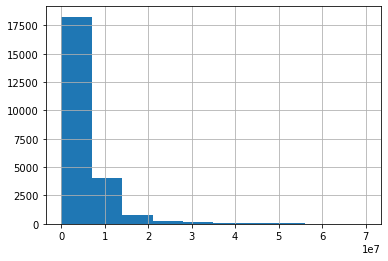

In [36]:
# Выберем цену на основе графика
## в некоторых случаях можно использовать сводную таблицу
## print(df.pivot_table(index='floor', values='last_price', aggfunc='count'))

print('Среднее значение', df['last_price'].mean())
print('Медианное значение', df['last_price'].median())
print('Минимальное значение', df['last_price'].min())
print('Максимальное значение', df['last_price'].max())
print(df['last_price'].hist(range=(1, 70000000)))

Очевидно что максимальная цена 763млн рублей является аномально высокой
Из графика видно, что цены выше 60 млн встречаются крайне редко, отфильтруем эти значения

In [37]:
# Аномальные данные
last_price_anomal = df[(df['last_price'] > 60000000)]
display('Всего аномальных значений', len(last_price_anomal))

'Всего аномальных значений'

101

Удалим аномальные значения и сравним изменение средних величин

In [38]:
# Отфильтруем аномальные значения и сравним изменение средних величин
# Для отфильтрованных значений создадим новый датафрэйм
df_good = df[df['last_price'] < 60000000]

print('Старые данные')
print('Среднее значение', df['last_price'].mean())
print('Медианное значение', df['last_price'].median())
print('Минимальное значение', df['last_price'].min())
print('Максимальное значение', df['last_price'].max())
print()
print('Новые данные')
print('Среднее значение', df_good['last_price'].mean())
print('Медианное значение', df_good['last_price'].median())
print('Минимальное значение', df_good['last_price'].min())
print('Максимальное значение', df_good['last_price'].max())

Старые данные
Среднее значение 6541548.771551542
Медианное значение 4650000.0
Минимальное значение 12190.0
Максимальное значение 763000000.0

Новые данные
Среднее значение 6062266.112594288
Медианное значение 4600000.0
Минимальное значение 12190.0
Максимальное значение 59914124.0


Старые данные
AxesSubplot(0.125,0.125;0.775x0.755)


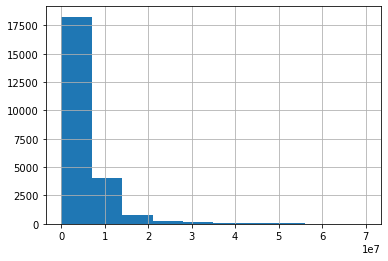

Новые данные
AxesSubplot(0.125,0.125;0.775x0.755)


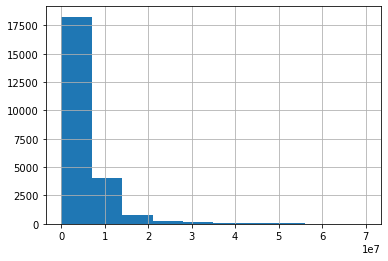

In [39]:
# Сравним графики:
print('Старые данные')
print(df['last_price'].hist(range=(1, 70000000)))
plt.show()
print('Новые данные')
print(df_good['last_price'].hist(range=(1, 70000000)))

Из графиков видно, что структура даных не изменилась, т.е. аномальные значения убраны корректно

Рассмотрим значение 

Максимальное значение total_area 900.0

Среднее значение 59.42458174421542
Медианное значение 52.0
Минимальное значение 12.0
Максимальное значение 517.0
AxesSubplot(0.125,0.125;0.775x0.755)


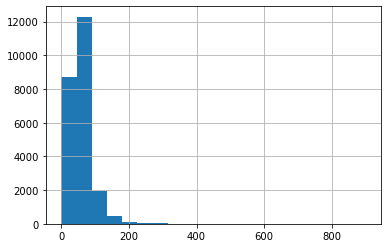

In [40]:
# Выберем площадь на основе графика
print('Среднее значение', df_good['total_area'].mean())
print('Медианное значение', df_good['total_area'].median())
print('Минимальное значение', df_good['total_area'].min())
print('Максимальное значение', df_good['total_area'].max())
print(df_good['total_area'].hist(bins = 20, range=(0, 900)))

Из графика видно, что площадь свыше 500м2 встречается крайне редко, удалим эти данные.

In [41]:
# Аномальные данные
total_area_anomal = df_good[(df_good['total_area'] > 500)]
display('Всего аномальных значений', len(total_area_anomal))

'Всего аномальных значений'

1

In [42]:
df_good = df_good[df_good['total_area'] < 500]

Рассмотрим значение

Минимальное значение rooms 0

In [43]:
# Аномальные данные
rooms_anomal = df_good[(df_good['rooms'] == 0)]
display('Всего аномальных значений', len(rooms_anomal))

'Всего аномальных значений'

196

In [44]:
# рассмотрим эти данные
display(rooms_anomal)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,last_price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.771499,24,15.50,2,NaN,...,1.0,502,181,90740.740741,3,3,2017,другой,0.574074,0.337037
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.771499,14,17.00,1,NaN,...,1.0,502,45,92800.000000,2,9,2017,первый,0.680000,0.364000
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.771499,17,24.75,4,NaN,...,2.0,982,64,91479.158982,0,3,2018,другой,0.912947,0.335669
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.771499,26,24.30,19,NaN,...,1.0,593,430,98110.465116,1,3,2017,другой,0.706395,0.264535
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.771499,10,25.00,7,NaN,...,1.0,502,29,74000.000000,2,2,2019,другой,1.000000,0.364000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.771499,25,18.00,16,NaN,...,1.0,623,14,123076.923077,4,9,2017,другой,0.692308,0.350000
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.771499,24,18.00,4,NaN,...,1.0,502,4,90252.707581,3,9,2017,другой,0.649819,0.328520
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.771499,19,26.00,8,NaN,...,2.0,112,31,128846.153846,4,9,2018,другой,1.000000,0.350000
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.771499,9,18.00,8,NaN,...,1.0,502,82,50000.000000,5,11,2017,другой,0.620690,0.313793


В данных нет аномалий указывающих на то, что эти данные ошибочные, можно предположить, что продавалась квартира студия, оставим эти данные без изменений

Рассмотрим данные высота потолков

Минимальное значение ceiling_height 1.0

Максимальное значение ceiling_height 100.0

Очевидно, что для жилой недвижимости высота потолков меньше двух метров, является подозрительной, рассмотрим средние значения и построим график

Среднее значение 2.7693776920166697
Медианное значение 2.7714988968559835
Минимальное значение 1.0
Максимальное значение 100.0
AxesSubplot(0.125,0.125;0.775x0.755)


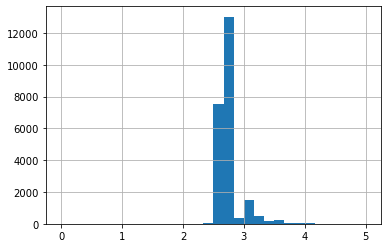

In [45]:
print('Среднее значение', df_good['ceiling_height'].mean())
print('Медианное значение', df_good['ceiling_height'].median())
print('Минимальное значение', df_good['ceiling_height'].min())
print('Максимальное значение', df_good['ceiling_height'].max())
print(df_good['ceiling_height'].hist(bins=30, range=(0, 5)))

Из графика хорошо видно, что основные данные находятся между 2 метрами и 4.5
Рассмотрим ближе

AxesSubplot(0.125,0.125;0.775x0.755)


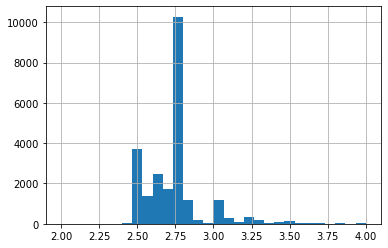

In [46]:
print(df_good['ceiling_height'].hist(bins=30, range=(2, 4)))

In [47]:
# Удалим данные от 2 до 4 метров
df_good = df_good.query('2 <= ceiling_height <= 4')

AxesSubplot(0.125,0.125;0.775x0.755)


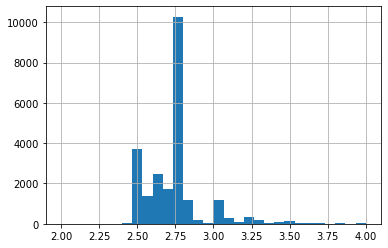

In [48]:
# Проверим данные по графику
print(df_good['ceiling_height'].hist(bins=30, range=(2, 4)))

Структура данных сохранилась

Проверим данные всего этажей

Максимальное значение floors_total 60

Среднее значение 10.691843413949929
Медианное значение 9.0
Минимальное значение 1
Максимальное значение 60
AxesSubplot(0.125,0.125;0.775x0.755)


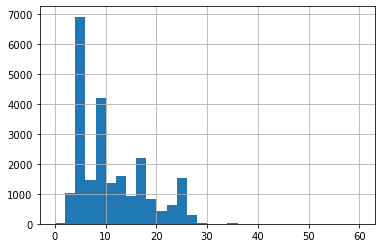

In [49]:
print('Среднее значение', df_good['floors_total'].mean())
print('Медианное значение', df_good['floors_total'].median())
print('Минимальное значение', df_good['floors_total'].min())
print('Максимальное значение', df_good['floors_total'].max())
print(df_good['floors_total'].hist(bins=30, range=(0, 60)))

Из графика видно, что данные больше 40 являются аномальными

In [50]:
# Аномальные данные
floors_total_anomal = df_good[(df_good['floors_total'] > 40)]
display('Всего аномальных значений', len(floors_total_anomal))
display(floors_total_anomal)

'Всего аномальных значений'

2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,last_price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60,27.4,4,NaN,...,3.0,614,166,83516.483516,3,6,2018,другой,0.602198,0.162637
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52,10.5,18,NaN,...,0.0,502,45,99450.000000,0,9,2018,другой,0.262500,0.350000


Аномальных значений крайне мало и они корректны, оставим эти данные.

Рассмотрим следующие данные:

Жилая площадь

Минимальное значение living_area 2.0

Максимальное значение living_area 631.0

Среднее значение 36.1003290479871
Медианное значение 31.0
Минимальное значение 2.0
Максимальное значение 494.1
AxesSubplot(0.125,0.125;0.775x0.755)


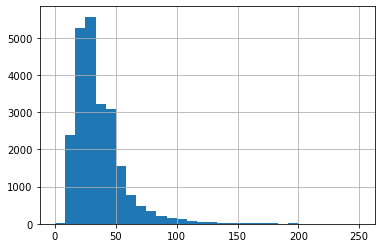

In [51]:
print('Среднее значение', df_good['living_area'].mean())
print('Медианное значение', df_good['living_area'].median())
print('Минимальное значение', df_good['living_area'].min())
print('Максимальное значение', df_good['living_area'].max())
print(df_good['living_area'].hist(bins=30, range=(0, 250)))

AxesSubplot(0.125,0.125;0.775x0.755)


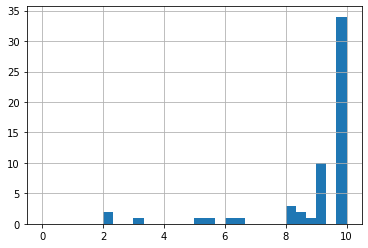

In [52]:
# Рассмотрим детальней минимальные значения
print(df_good['living_area'].hist(bins=30, range=(0, 10)))

Из приведенных графиков видно, что данные о жилой площади меньше 8м2 и больше 200 можно рассматривать как аномальные, рассмотрим эти данные и удалим их.

In [53]:
# Аномальные данные
living_area_anomal = df_good[(df_good['living_area'] < 8) | (df_good['living_area'] > 200) ]

display('Всего аномальных значений', len(living_area_anomal))
display(living_area_anomal)

'Всего аномальных значений'

34

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,last_price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area
660,3,49950000.0,483.90,2017-10-04T00:00:00,7,3.200000,6,312.50,4,NaN,...,3.0,22,391,103223.806572,2,10,2017,другой,0.645795,0.054557
866,5,25000000.0,363.00,2017-12-23T00:00:00,14,3.160000,5,222.00,4,NaN,...,2.0,435,418,68870.523416,5,12,2017,другой,0.611570,0.045730
2127,14,32500000.0,234.00,2016-05-26T00:00:00,5,2.771499,7,234.00,6,NaN,...,0.0,502,180,138888.888889,3,5,2016,другой,1.000000,0.038889
2462,18,7900000.0,201.50,2018-08-17T00:00:00,7,2.771499,2,201.50,2,NaN,...,0.0,502,35,39205.955335,4,8,2018,другой,1.000000,0.045161
2580,6,30900000.0,338.60,2017-10-16T00:00:00,7,3.860000,6,230.00,4,NaN,...,0.0,502,406,91258.121677,0,10,2017,другой,0.679268,0.059067
3242,7,4440000.0,41.00,2017-07-02T00:00:00,1,2.771499,17,3.00,17,NaN,...,0.0,502,216,108292.682927,6,7,2017,последний,0.073171,0.268293
3676,12,28789000.0,441.98,2019-01-23T00:00:00,4,2.771499,6,441.98,6,NaN,...,0.0,502,180,65136.431513,2,1,2019,другой,1.000000,0.079302
5517,20,23000000.0,204.00,2017-11-07T00:00:00,6,3.300000,2,204.00,2,NaN,...,1.0,178,299,112745.098039,1,11,2017,другой,1.000000,0.044608
5873,0,38000000.0,400.00,2019-03-15T00:00:00,7,3.600000,3,400.00,1,NaN,...,0.0,502,180,95000.000000,4,3,2019,первый,1.000000,0.022750
6221,8,34000000.0,470.30,2018-01-14T00:00:00,4,2.771499,3,248.70,3,NaN,...,3.0,122,179,72294.280247,6,1,2018,другой,0.528811,0.085052


AxesSubplot(0.125,0.125;0.775x0.755)


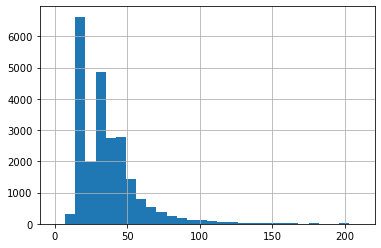

In [54]:
# Отфильтруем эти данные
df_good = df_good[(df_good['living_area'] >= 8) | (df_good['living_area'] <= 200) ]

# Рассмотрим график после изменений
print(df_good['living_area'].hist(bins=30, range=(0, 210)))

Из графика хорошо видно, что аномальные данные удалены, структура данных сохранена.

Рассмотрим аномальные данные площадь кухни

Максимальное значение kitchen_area 112.0

Среднее значение 10.331798359332234
Медианное значение 9.1
Минимальное значение 1.3
Максимальное значение 100.7
AxesSubplot(0.125,0.125;0.775x0.755)


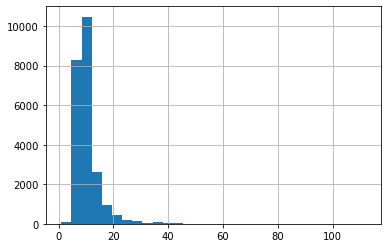

In [55]:
print('Среднее значение', df_good['kitchen_area'].mean())
print('Медианное значение', df_good['kitchen_area'].median())
print('Минимальное значение', df_good['kitchen_area'].min())
print('Максимальное значение', df_good['kitchen_area'].max())
print(df_good['kitchen_area'].hist(bins=30, range=(1, 112)))

AxesSubplot(0.125,0.125;0.775x0.755)


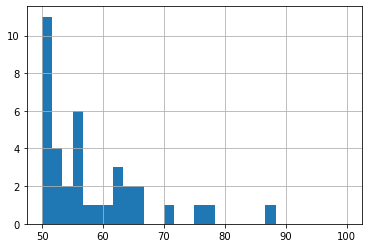

In [56]:
# Рассмотрим в диапазоне от 40 до 80
print(df_good['kitchen_area'].hist(bins=30, range=(50, 100)))

Из этих двух графиков хорошо видно, что значения больше 70 можно считать аномальными, удалим их.

In [57]:
# Аномальные данные площадь кухни
kitchen_area_anomal = df_good[(df_good['kitchen_area'] > 70) ]

display('Всего аномальных значений', len(kitchen_area_anomal))
display(kitchen_area_anomal)

'Всего аномальных значений'

4

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,last_price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area
2489,9,12500000.0,255.0,2017-04-21T00:00:00,3,2.771499,2,153.9,2,NaN,...,3.0,198,102,49019.607843,4,4,2017,другой,0.603529,0.394902
4394,20,57000000.0,174.0,2015-11-09T00:00:00,3,3.200000,10,95.0,6,NaN,...,3.0,199,1039,327586.206897,0,11,2015,другой,0.545977,0.442529
10867,1,56844500.0,177.9,2015-01-15T00:00:00,3,2.771499,6,87.2,5,True,...,3.0,569,180,319530.635188,3,1,2015,другой,0.490163,0.490163
14644,17,47000000.0,150.0,2017-02-28T00:00:00,4,3.700000,6,58.0,5,NaN,...,0.0,502,507,313333.333333,1,2,2017,другой,0.386667,0.500000


AxesSubplot(0.125,0.125;0.775x0.755)


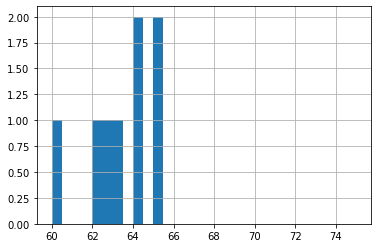

In [58]:
# отфильтруем аномальные данные площадь кухни
df_good = df_good[(df_good['kitchen_area'] < 70)]

# проверка

print(df_good['kitchen_area'].hist(bins=30, range=(60, 75)))

Рассмотрим аномальные данные Длительность размещения

Максимальное значение days_exposition 1580

Среднее значение 180.02027888784968
Медианное значение 123.0
Минимальное значение 1
Максимальное значение 1580
AxesSubplot(0.125,0.125;0.775x0.755)


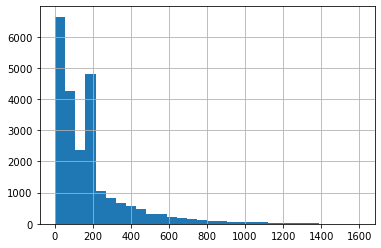

In [59]:
print('Среднее значение', df_good['days_exposition'].mean())
print('Медианное значение', df_good['days_exposition'].median())
print('Минимальное значение', df_good['days_exposition'].min())
print('Максимальное значение', df_good['days_exposition'].max())
print(df_good['days_exposition'].hist(bins=30, range=(1, 1600)))

AxesSubplot(0.125,0.125;0.775x0.755)


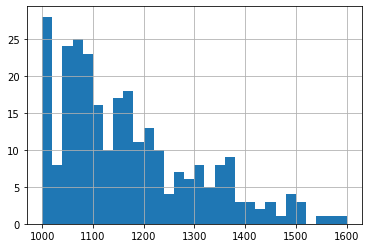

In [60]:
# рассмотрим блжет данные свыше 1000 дней
print(df_good['days_exposition'].hist(bins=30, range=(1000, 1600)))

Из этого графика хорошо видно, что значение в 1580 хоть и выглядит аномально большим по сравнению со средним значением 180 дней, но это значение не выпадает из обще динамики, оставим эти данные.

### Вывод по редким значениям

Всего обработано 7 значений, отфильтрованы значения по 6 показателям.

Проверим отфильтрованные данные после фильтрации по средним величинам, так мы проверим корректность внесенных изменений.

In [61]:
# рассмотрим все данные данные
# для этого создадим функцию и для каждого столбца расчитаем
# минимальное значение, максимальное значение, медианное значение среднее значение
# логично предположить, что опираяь на среднее значение можно будет сразу найти столбцы с аномально большими значениями
columns_for_analysis_check = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenter_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']

count_column_for_analysis_check = 0            # количество измеренний
wrong_column_for_analysis_check = 0            # количество неверных значений
wrong_list_for_analysis_check = []             # пустой список для неверных значений 

for index in columns_for_analysis_check:
    try:
        # печатаем
        print('Среднее значение старое', index, df[index].mean())
        print('Среднее значение новое', index, df_good[index].mean())
        # графики выводятся с периодической ошибкой
        # print(df.plot())
        # plt.show()
        print()
        # счетчик
        count_column_for_analysis += 1
    except:
        wrong_list_for_analysis.append(index)
        wrong_column_for_analysis +=1 

print('Количество измерений', count_column_for_analysis_check)
print('Некорректные строки', wrong_column_for_analysis_check)
print('Количество некорректных строк', wrong_column_for_analysis_check)
print('Некорректные строки', wrong_list_for_analysis_check)

Среднее значение старое total_images 9.858475041140977
Среднее значение новое total_images 9.839639486438228

Среднее значение старое last_price 6541548.771551542
Среднее значение новое last_price 6038042.225363489

Среднее значение старое total_area 60.348650997932225
Среднее значение новое total_area 59.30345973981783

Среднее значение старое rooms 2.070635891809781
Среднее значение новое rooms 2.0579882663038855

Среднее значение старое ceiling_height 2.7714988968563197
Среднее значение новое ceiling_height 2.739075797203752

Среднее значение старое floors_total 10.66774969407992
Среднее значение новое floors_total 10.692968285009778

Среднее значение старое living_area 36.7754302507276
Среднее значение новое living_area 36.08742205220613

Среднее значение старое floor 5.892358327355584
Среднее значение новое floor 5.897287645608366

Среднее значение старое studio 0.006287185113295919
Среднее значение новое studio 0.006291981974321912

Среднее значение старое open_plan 0.00282712350

По изменениям средних величин, хорошо видно, что показатели изменились незначительно, из этого можно сделать вывод, что изменения сделаны корректно и отфильтрованные данные более доставерны.

Данные готовы к основному анализу.

### Какие факторы больше всего влияют на стоимость квартир?

Изучим, зависит ли цена от 

- площади
- числа комнат
- удалённости от центра

Изучите зависимость цены от того на каком этаже расположена квартира: первом, последнем или другом.

Также изучите зависимость от даты размещения: дня недели, месяца и года.

Расчитаем коэффициент Пирсона и построим график для изучения зависимости цены от площади 

In [62]:
# Рассчитаем корреляцию: коэффициент Пирсона находят методом corr()
# неотфильтрованные данные print(df['last_price'].corr(df['total_area']))
# 
print('Коэффициент Пирсона - цена/площадь:', df_good['last_price'].corr(df_good['total_area']))

Коэффициент Пирсона - цена/площадь: 0.7771226032950248


Крайнее значение у коэфицента Пирсона 1.
0.777 достаточно близко к 1, значит у этих данных есть взаимосвязь

Рассмотрим график для двух значений last_price и total_area
Так же рассмотрим график с отсортированными и неотсортироваными значениями, для оценки выбрасов и правильности фильтрации.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

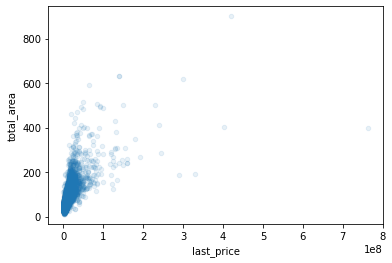

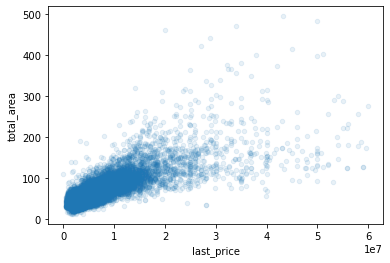

In [63]:
# Построим гистаграмму с выбросами, отсортируем данные по цене, уменьшим прозрачность до 10%
df.sort_values('last_price').plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)

# Построим гистаграмму без выбрасов, отсортируем данные по площади
df_good.sort_values('total_area').plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)

Коэффициент Пирсона - цена/площадь: 0.19203493138315603


<AxesSubplot:xlabel='last_price_square_meter', ylabel='total_area'>

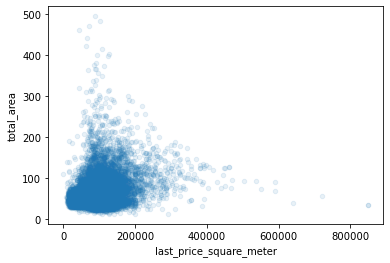

In [64]:
# Построим гистаграмму без выбрасов, для сравнения 
# Как влияет большая площадь квартиры на стоимость 1 м2

print('Коэффициент Пирсона - цена/площадь:', df_good['last_price_square_meter'].corr(df_good['total_area']))
df_good.plot(x='last_price_square_meter', y='total_area', kind='scatter', alpha=0.1)

Из графиков хорошо видно:

1. Есть взаимосвязь между стоимостью квартирые, и общей пложадь: чем больше площадь, тем выше цена квартиры.
2. Из графика видно, что выбросы не влияют на общую взаимосвязь между ценой и площадью, отфильтрованные значений не влияют на общую корреляцию. В то же время график стал намного наглядней, что означает, что фильтрация данных была произведена верно.
3. Сравнивая два последних графика, можно сказать, что чем больше площадь квартиры тем выше её стоимость в то же время, взаимосвязь между общей площадью квартиры судя по графику и коэффициенту Пирсона (0.77 против 0.19) намного меньше.

Расчитаем коэффициент Пирсона и построим график для изучения зависимости цены от числа комнат.

Коэффициент Пирсона - цена/комнаты: 0.5035432140289794


<AxesSubplot:xlabel='last_price', ylabel='rooms'>

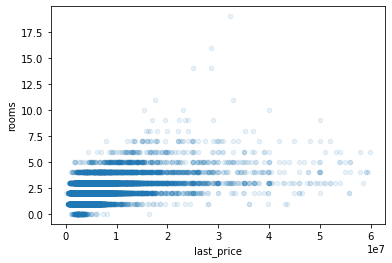

In [65]:
# Рассчитаем корреляцию: коэффициент Пирсона находят методом corr()
print('Коэффициент Пирсона - цена/комнаты:', df_good['last_price'].corr(df_good['rooms']))

# Построим гистаграмму без выбрасов, отсортируем данные по цене, уменьшим прозрачность до 10%
df_good.sort_values('last_price').plot(x='last_price', y='rooms', kind='scatter', alpha=0.1)

Коэффициент Пирсона - цена/комната 0.5, корреляция есть но она меньше чем цена/площадь, это же подтверждает график.

Из графика видно что самые высокие цены держаться в р-не 3-6 комнат.

Расчитаем коэффициент Пирсона и построим график для изучения зависимости цены от удалённости от центра.

Коэффициент Пирсона - цена/удалённость от центра: -0.2803279448291779


<AxesSubplot:xlabel='last_price', ylabel='city_сenter_nearest'>

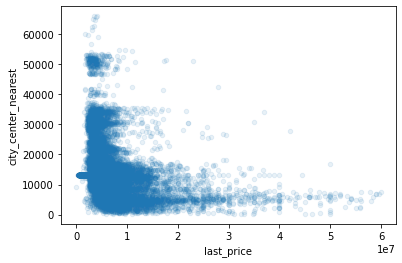

In [66]:
# Рассчитаем корреляцию: коэффициент Пирсона находят методом corr()
print('Коэффициент Пирсона - цена/удалённость от центра:', df_good['last_price'].corr(df_good['city_сenter_nearest']))

# Построим гистаграмму без выбрасов, отсортируем данные по цене, уменьшим прозрачность до 10%
df_good.plot(x='last_price', y='city_сenter_nearest', kind='scatter', alpha=0.1)

Коэффициент корреляции может принимать значения от -1 до +1. При этом отрицательный коэффициент корреляции позволяет принять гипотезу о наличии линейной отрицательной связи, т.е. увеличение значения одной переменной в большинстве случаев соответствует уменьшению значения коррелирующей с ней переменной.

На графике так же хорошо видно, что самые дорогие квартиры расположены в центре.

Изучим зависимость цены от того, на каком этаже расположена квартира:
    
- первом
- последнем 
- другом

Для оценки взаимосвязи создадим сводную таблицу со средним значением для каждой выборки и рассмтрим график

                last_price
floor_category            
другой           4742500.0
первый           3900000.0
последний        4700000.0


<AxesSubplot:xlabel='last_price', ylabel='floor_category'>

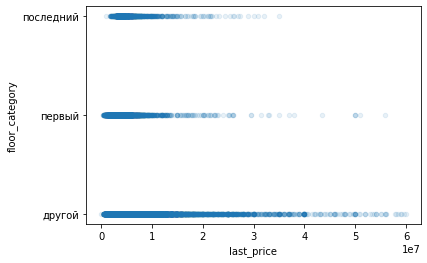

In [67]:
# Создадим сводную таблицу со средним значением
print(df_good.pivot_table(index='floor_category', values='last_price', aggfunc='median'))

# Построим гистаграмму без выбрасов, отсортируем данные по цене, уменьшим прозрачность до 10%
df_good.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.1)

Из таблицы и графика хорошо видно, что есть взаимосвязь между этажом и ценой квартиры:
- цена квартир на первом этаже иногде выше чем последнем
- самая высокая цена на квартиры в среднем и исходя из графика на квартиры, не распологающиеся на первом или последнем этажах

Изучим зависимость от даты размещения: дня недели, месяца и года.
Для этого построим графики по каждому показателю.

<AxesSubplot:xlabel='last_price', ylabel='year'>

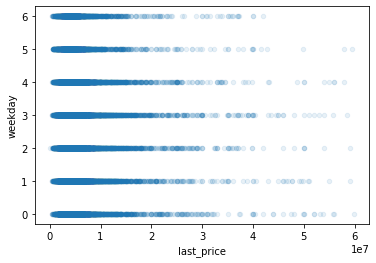

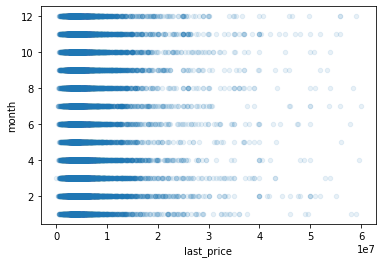

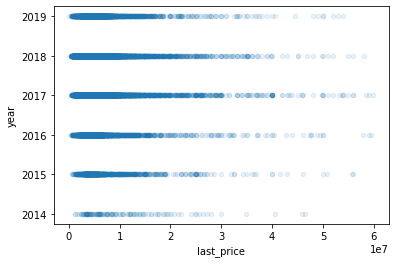

In [68]:
df_good.plot(x='last_price', y='weekday', kind='scatter', alpha=0.1)
df_good.plot(x='last_price', y='month', kind='scatter', alpha=0.1)
df_good.plot(x='last_price', y='year', kind='scatter', alpha=0.1)

Из графиков видно, что:
1. Взаимосвязи между днем недели публикации объявления и ценой, практически нет. Есть небольшое снижение цены для квартир, размещенных в 6 день, субботу
2. Взаимосвязи между стоимостью квартиры и месяцем публикации не наблюдается.
3. Цены на квартиры менялись в зависимости от года, в 2017 наблюдаетс пик стоимости квартир, пото идет незначительное повышение. Хорошо заметно планомерное повышение стоимости с 2014 до 2017 года.

Вывод по изученным факторам:

Из приведенных графиков и коэффициент Пирсона хорошо видно, что площадь квартиры имеет самое большое влияние на её стоимость.

### Добавим категории стоимости квартир

Для дальнейшего анализа недвижимости и влияния на стоимость разных параметров, создадим столбец с новым типом данным, разделим стоимость квадратного метра квартир на 5 категорий:
- люкс
- бизнес
- эконом плюс
- эконом

Для выбора ценовых категорий проанализируем данные по категории цена за м/2

In [69]:
df_good['last_price_square_meter'].describe()

count     23522.000000
mean      97765.662995
std       40061.547134
min         111.834862
25%       76485.820716
50%       94808.477256
75%      113813.810267
max      848484.848485
Name: last_price_square_meter, dtype: float64

На основе этих данных создадим группы которые будут использованы для дальнейшего анализа:

- люкс от 113000 до 1000000
- бизнес от 94000 до 113000
- эконом плюс от 76000 до 94000
- эконом от 0 до 76000

In [70]:
df_good['last_price_category']=df_good['last_price_square_meter'].apply(lambda x: 'эконом' if x<76000 else 'эконом плюс' if x<94000 else 'бизнес' if x< 113000 else 'люкс')

#df_good['last_price_category'].describe()

print(df_good['last_price_category'].value_counts())

люкс           6066
бизнес         5984
эконом         5777
эконом плюс    5695
Name: last_price_category, dtype: int64


Из выбранных нами категорий больше всего объявлений попало в категорию люкс, можно предположить, что это не должно быть так на самом деле, но т.к. создание категорий недвижимости не является главной целью этого исследования остановимся на выбранных диапазонах стоимости.

### Выберем 10 населённых пунктов

Используем стоимость м2 и добавим новый столцец с этими данными

In [71]:
## df_good['last_price_square_meter'] = df_good['last_price'] / df_good['total_area']

display(df_good.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,last_price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area,last_price_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16,51.0,8,NaN,...,755,180,120370.370370,3,3,2019,другой,0.472222,0.231481,люкс
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11,18.6,1,NaN,...,502,81,82920.792079,1,12,2018,первый,0.460396,0.272277,эконом плюс
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5,34.3,4,NaN,...,574,558,92785.714286,3,8,2015,другой,0.612500,0.148214,эконом плюс
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14,32.0,13,NaN,...,48,121,100000.000000,1,6,2018,другой,0.320000,0.410000,бизнес
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.771499,12,14.4,5,NaN,...,502,55,95065.789474,0,9,2018,другой,0.473684,0.299342,бизнес


Выберем 10 населенных пунктов с самым большим количество объявлений.

Создадим сводную таблицу и используя метод 'count' расчитаем количество объявлений по каждой категории

In [72]:
df_good_ln_10 = df_good.pivot_table(index='locality_name', values='last_price', aggfunc='count')

display (df_good_ln_10.sort_values(by='last_price', ascending=False).head(10))

,last_price
locality_name,
Санкт-Петербург,15611
посёлок Мурино,520
посёлок Шушары,440
Всеволожск,397
Пушкин,368
Колпино,338
посёлок Парголово,327
Гатчина,306
деревня Кудрово,299


In [73]:
# Создадим переменную только с этими именами
ln_only_10 = df_good_ln_10.sort_values(by='last_price', ascending=False).head(10)
display(ln_only_10)

## то же самое но last_price >= 236
## df_good_ln_only_10 = df_good_ln_10.query('last_price >= 236')
## display(df_good_ln_only_10)

,last_price
locality_name,
Санкт-Петербург,15611
посёлок Мурино,520
посёлок Шушары,440
Всеволожск,397
Пушкин,368
Колпино,338
посёлок Парголово,327
Гатчина,306
деревня Кудрово,299


In [74]:
# отфильтруем таблицу по этим именам
## good_data = data.query('id in @good_ids.index')
df_good_10 = df_good.query('locality_name in @ln_only_10.index')

display(df_good_10.head())
print(len(df_good_10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,last_price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area,last_price_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16,51.0,8,NaN,...,755,180,120370.370370,3,3,2019,другой,0.472222,0.231481,люкс
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11,18.6,1,NaN,...,502,81,82920.792079,1,12,2018,первый,0.460396,0.272277,эконом плюс
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5,34.3,4,NaN,...,574,558,92785.714286,3,8,2015,другой,0.612500,0.148214,эконом плюс
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14,32.0,13,NaN,...,48,121,100000.000000,1,6,2018,другой,0.320000,0.410000,бизнес
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.771499,26,10.6,6,NaN,...,502,155,99195.710456,3,11,2017,другой,0.284182,0.386059,бизнес


18842


Рассчитаем среднею стоимость м2 для 10 самых популярных районов

In [75]:
df_good_10 = df_good_10.groupby('locality_name')['last_price_square_meter'].median().sort_values(ascending=False)
display(df_good_10)

locality_name
Санкт-Петербург      104522.613065
Пушкин                99993.589744
деревня Кудрово       91860.465116
посёлок Парголово     91642.857143
посёлок Мурино        85878.462169
посёлок Шушары        76876.172608
Колпино               74723.748474
Гатчина               67860.569236
Всеволожск            65789.473684
Выборг                58133.213989
Name: last_price_square_meter, dtype: float64

Из сводной таблицы видно, что самая высокая цена за м2 в Санкт-Петербурге а самая низкая в Выборге

### Изучим предложения квартир

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
- Выделите квартиры в Санкт-Петербурге (locality_name).
- Ваша задача — выяснить, какая область входит в центр. 
- Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
- После этого посчитайте среднюю цену для каждого километра. 
- Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
- Определите границу, где график сильно меняется, — это и будет центральная зона.

In [76]:
# Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.
# из-за возникающей ошибки с выделением квартир в Санкт-Петербурге вначале создам столбец с данными
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
# 
df_good['city_сenter_kilometer'] = (df_good['city_сenter_nearest'] / 1000).round()
display(df_good.head(10))
print(len(df_good))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,last_price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area,last_price_category,city_сenter_kilometer
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16,51.00,8,NaN,...,180,120370.370370,3,3,2019,другой,0.472222,0.231481,люкс,16.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.771499,11,18.60,1,NaN,...,81,82920.792079,1,12,2018,первый,0.460396,0.272277,эконом плюс,19.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.771499,5,34.30,4,NaN,...,558,92785.714286,3,8,2015,другой,0.612500,0.148214,эконом плюс,14.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14,32.00,13,NaN,...,121,100000.000000,1,6,2018,другой,0.320000,0.410000,бизнес,8.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.771499,12,14.40,5,NaN,...,55,95065.789474,0,9,2018,другой,0.473684,0.299342,бизнес,13.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.771499,26,10.60,6,NaN,...,155,99195.710456,3,11,2017,другой,0.284182,0.386059,бизнес,19.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.771499,24,71.60,22,NaN,...,180,110544.692737,3,4,2019,другой,1.000000,0.263966,бизнес,12.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.771499,27,15.43,26,NaN,...,189,87454.764777,2,5,2018,другой,0.465320,0.265682,эконом плюс,13.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500000,9,43.60,7,NaN,...,289,88524.590164,6,2,2017,другой,0.714754,0.106557,эконом плюс,15.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.670000,12,20.30,3,NaN,...,137,127525.252525,3,11,2017,другой,0.512626,0.214646,люкс,14.0


23522


In [77]:
# Выделим квартиры в Санкт-Петербурге (locality_name).

df_good_spb = df_good.query('locality_name == "Санкт-Петербург"')

display(df_good_spb.head())
print(len(df_good_spb))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,last_price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area,last_price_category,city_сenter_kilometer
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16,51.0,8,NaN,...,180,120370.370370,3,3,2019,другой,0.472222,0.231481,люкс,16.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5,34.3,4,NaN,...,558,92785.714286,3,8,2015,другой,0.612500,0.148214,эконом плюс,14.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14,32.0,13,NaN,...,121,100000.000000,1,6,2018,другой,0.320000,0.410000,бизнес,8.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.771499,24,71.6,22,NaN,...,180,110544.692737,3,4,2019,другой,1.000000,0.263966,бизнес,12.0
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.500000,9,43.6,7,NaN,...,289,88524.590164,6,2,2017,другой,0.714754,0.106557,эконом плюс,15.0


15611


In [78]:
# посчитаtv среднюю цену для каждого километра.
# сгруппируем данные методом groupby по значению километров
# расчитаем среднее значение методом median()
df_good_spb_median = df_good_spb.groupby('city_сenter_kilometer')['last_price_square_meter'].median()
print(df_good_spb_median)
# Для проверки расчитаем среднее значение по всем данным по Санкт-Петербургу
df_good_spb_median_all = sum(df_good_spb['last_price_square_meter']) / len(df_good_spb)
print (df_good_spb_median_all)

city_сenter_kilometer
0.0     144957.983193
1.0     125135.746606
2.0     118418.337264
3.0     108097.545220
4.0     116981.132075
5.0     126323.529412
6.0     128840.579710
7.0     125000.000000
8.0     122549.019608
9.0     105764.119601
10.0    106707.317073
11.0    103451.125583
12.0    103974.500014
13.0    104545.454545
14.0    101894.106611
15.0    101315.789474
16.0     97500.000000
17.0     94142.156863
18.0     95000.000000
19.0     97241.379310
20.0    104000.000000
21.0     89705.882353
22.0     88781.474414
23.0     89965.397924
24.0     86184.841701
25.0     93612.162162
26.0     89393.939394
27.0    132115.709459
28.0     79372.093023
29.0     76084.734212
32.0     64030.112800
41.0     96029.994391
Name: last_price_square_meter, dtype: float64
112406.30434926333


Построим график на основе полученных данных

<AxesSubplot:xlabel='city_сenter_kilometer'>

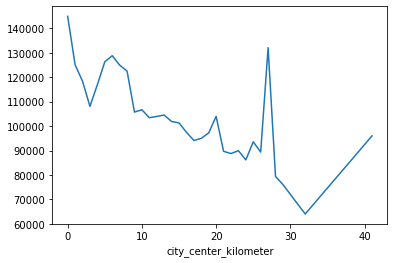

In [79]:
# построим график

df_good_spb_median.plot()


Из графика видно что есть две зоны с высокой ценой: в р-не 7км и 27км по удаленности от города.
Исходя из цены, можно сделать предположение, что центр города заканчивается на расстоянии 7 ум от центра

### Выделим сегмент квартир в центре

Выделите сегмент квартир в центре за удаленност возьмем значени в 7км.

Проанализируем эту территорию и изучим следующие параметры:

- площадь
- цена
- число комнат
- высота потолков

Также выделите факторы, которые влияют на стоимость квартиры 
- число комнат
- этаж
- удалённость от центра
- дата размещения объявления

Отличаются ли эти показатели от общих выводов по всей базе?

Выделим сегмент с удаленностью 7км от центра, для этого отфильтруем только те значения которые подходят под ограничение по расстоянию т.е. меньше 7.

In [80]:
df_good_spb_center = df_good_spb.query('city_сenter_kilometer <7')
display(df_good_spb_center.head())
print('Квартир с Спб в радиусе 7км:', len(df_good_spb_center))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,last_price_square_meter,weekday,month,year,floor_category,living_total_area,kitchen_total_area,last_price_category,city_сenter_kilometer
24,8,6500000.0,97.2,2015-10-31T00:00:00,2,2.771499,3,46.5,1,NaN,...,265,66872.427984,5,10,2015,первый,0.478395,0.201646,эконом,2.0
35,6,15500000.0,149.0,2017-06-26T00:00:00,5,2.771499,5,104.0,4,NaN,...,644,104026.845638,0,6,2017,другой,0.697987,0.114094,бизнес,4.0
61,18,7990000.0,74.0,2017-08-24T00:00:00,2,2.771499,4,43.0,4,NaN,...,609,107972.972973,3,8,2017,другой,0.581081,0.270270,бизнес,4.0
63,2,20000000.0,118.0,2018-09-11T00:00:00,3,3.000000,9,68.0,7,NaN,...,37,169491.525424,1,9,2018,другой,0.576271,0.135593,люкс,5.0
99,32,9600000.0,90.0,2017-09-26T00:00:00,4,2.771499,5,67.0,2,NaN,...,104,106666.666667,1,9,2017,другой,0.744444,0.088889,бизнес,3.0


Квартир с Спб в радиусе 7км: 3006


Рассмотрим данные в центре Спб по следующим параметрам:

- rooms — число комнат
- total_area — общая площадь квартиры
- last_price_square_meter - цена за м2
- ceiling_height - высота потолков

Построим сводную таблицу для анализа данных, где в качестве индексов возьмем 

- rooms — число комнат

In [81]:
df_good_spb_center_pivot = df_good_spb_center.pivot_table(index='rooms', values=['last_price_square_meter', 'total_area', 'ceiling_height'], aggfunc=['mean', 'count'])

display(df_good_spb_center_pivot)

df_good_spb_center[['total_area', 'last_price_square_meter', 'rooms', 'ceiling_height']].describe()

## test.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

mean                                              count  \
      ceiling_height last_price_square_meter  total_area ceiling_height   
rooms                                                                     
0           2.914423           145285.508666   36.230769             13   
1           2.869979           154795.668236   43.713401            441   
2           2.940356           140238.310940   65.663771            875   
3           2.984584           133692.260445   91.854537            928   
4           3.025560           118572.554344  116.866009            431   
5           3.142365           115659.052019  152.036368            190   
6           3.120250           110537.428339  188.904412             68   
7           3.202244           111803.423828  215.800000             43   
8           3.121812            94558.037616  226.650000              8   
9           3.175000            85793.758283  263.600000              2   
10          3.325000           104828.543618  253.050000              2   
11          3.415000           132639.736685  188.900000              2   
14          2.771499           116784.841076  245.400000              1   
16          3.000000           105555.555556  270.000000              1   
19          2.771499            86091.831287  374.600000              1   

                                          
      last_price_square_meter total_area  
rooms                                     
0                          13         13  
1                         441        441  
2                         875        875  
3                         928        928  
4                         431        431  
5                         190        190  
6                          68         68  
7                          43         43  
8                           8          8  
9                           2          2  
10                          2          2  
11                          2          2  
14                          1          1  
16                          1          1  
19                          1          1

,total_area,last_price_square_meter,rooms,ceiling_height
count,3006.000000,3006.000000,3006.000000,3006.000000
mean,89.135323,134412.523231,2.837991,2.977492
std,47.488839,59062.582052,1.437795,0.300400
min,12.000000,15345.268542,0.000000,2.400000
25%,58.000000,98499.204877,2.000000,2.771499
50%,79.000000,121241.082470,3.000000,2.800000
75%,108.000000,151550.662879,3.000000,3.150000
max,483.900000,848484.848485,19.000000,4.000000


Из приведенных данных хорошо видно, что :
    1. Больше всего квартир продается с тремя комнатами.
    2. Средняя цена выше всего для недвижимости на первом этаже. 
    3. Есть взаимосвязь между ценой за квадратный метр и количеством комнат, максимальная цена за квадратный метр на квартиры с числом комнат от 0 до 2х.
    4. Чаще всего продаются квартиры с высотой потолков 2.94-3.02 метра и их цена близка к среднему значени 134000р за м2
    5. Продается мало квартир с количество комнат больше 7, т.е. это достаточно редкий тип недвижимости, и при этом цена за м2 в этой недвижимости ниже среднего.  

<AxesSubplot:xlabel='rooms'>

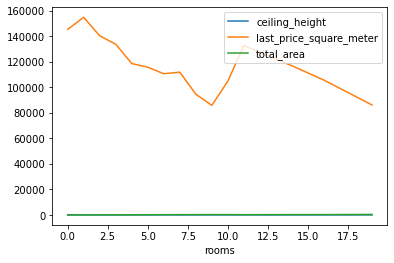

In [82]:
# Построим график методом plot для анализа взаимосвязей
# ТАК и не нашел можно ли обратиться к отдельному столбцу по его названию в сводной таблице
# поэтому построим для каждого отдельного типа данных свою таблицу

df_good_spb_center_pivot.plot(y='mean')

<AxesSubplot:xlabel='last_price_square_meter', ylabel='total_area'>

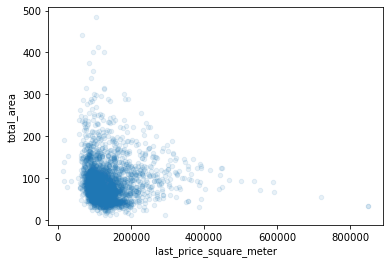

In [83]:
# Рассмотрим взаимосвязь между ценой квартиры в центре Санкт-Петербурга и площадью
df_good_spb_center.plot(x='last_price_square_meter', y='total_area', kind='scatter', alpha=0.1)


<AxesSubplot:xlabel='last_price_square_meter', ylabel='ceiling_height'>

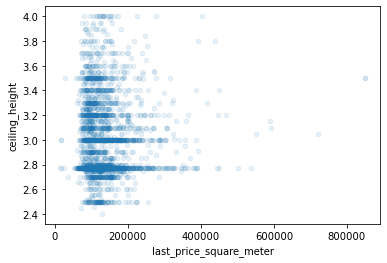

In [84]:
# Рассмотрим взаимосвязь между ценой квартиры в центре Санкт-Петербурга высотой потолков
df_good_spb_center.plot(x='last_price_square_meter', y='ceiling_height', kind='scatter', alpha=0.1)

Из приведенных данных хорошо видно, что :
- Больше всего квартир продается с тремя комнатами.
- Средняя цена выше всего для недвижимости на первом этаже. 
- Есть взаимосвязь между ценой за квадратный метр и количеством комнат, максимальная цена за квадратный метр на квартиры с числом комнат от 0 до 2х.
- Чаще всего продаются квартиры с высотой потолков 2.94-3.02 метра и их цена близка к среднему значени 134000р за м2
- Продается мало квартир с количество комнат больше 7, т.е. это достаточно редкий тип недвижимости, и при этом цена за м2 в этой недвижимости ниже среднего.
- Есть ярко выраженная взаимосвязь между общей площадью квартиры и её ценой
- Есть небольшая взимосвязь между ценой квартиры и высотой потолков: исходя из графика видно, что в среднем самая высокая цена на квартиры с высотой потолков 2.8 метра

Также выделите факторы, которые влияют на стоимость квартиры 
- число комнат
- этаж
- удалённость от центра
- дата размещения объявления

Для этого создадим сводную таблицу со следующими данными
- last_price_category - ценовая категория квартиры

- rooms - число комнат
- city_сenter_kilometer - удаленность от центра в километрах
- year - год размещения
- floor - этаж

Создадим две таблицы для сравнения: по центру Санкт-Петербурга и по всем данным.
Вместо данных о дате размещения возьмем обработанные данные: год размещения т.к. они будут более информативны в сводке.


In [85]:
# Центр Санкт-Петербурга

df_good_spb_center_pivot = df_good_spb_center.pivot_table(index='last_price_category', values=['rooms', 'floor', 'city_сenter_kilometer', 'year'], aggfunc=['mean', 'count'])
display(df_good_spb_center_pivot)

# Все данные
df_good_pivot = df_good.pivot_table(index='last_price_category', values=['rooms', 'floor', 'city_сenter_kilometer', 'year'], aggfunc=['mean', 'count'])
display(df_good_pivot)

mean                                   \
                    city_сenter_kilometer     floor     rooms         year   
last_price_category                                                          
бизнес                           4.065770  3.439462  3.115097  2017.110613   
люкс                             4.271845  4.496288  2.474586  2017.250714   
эконом                           4.036364  3.336364  4.063636  2016.818182   
эконом плюс                      4.044118  3.186975  3.502101  2017.000000   

                                    count                    
                    city_сenter_kilometer floor rooms  year  
last_price_category                                          
бизнес                                669   669   669   669  
люкс                                 1751  1751  1751  1751  
эконом                                110   110   110   110  
эконом плюс                           476   476   476   476

mean                                   \
                    city_сenter_kilometer     floor     rooms         year   
last_price_category                                                          
бизнес                          13.606451  6.579378  1.892881  2017.415943   
люкс                            10.568744  7.097758  1.984833  2017.480877   
эконом                          16.098494  4.148347  2.188160  2017.317466   
эконом плюс                     15.787182  5.676032  2.177349  2017.255838   

                                    count                    
                    city_сenter_kilometer floor rooms  year  
last_price_category                                          
бизнес                               5984  5984  5984  5984  
люкс                                 6066  6066  6066  6066  
эконом                               5777  5777  5777  5777  
эконом плюс                          5695  5695  5695  5695

Для анализа данных создадим графики, методом plot() первый со значениями по центру Санкт-Петербурга, второй со значениями по России.

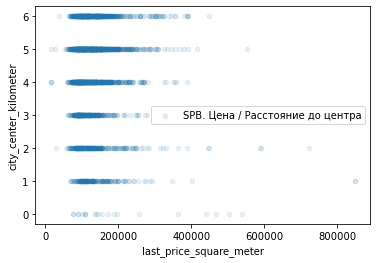

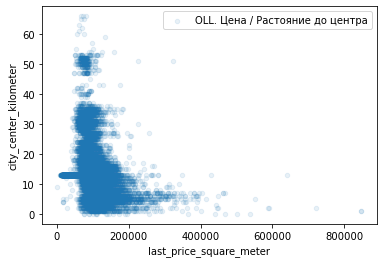

In [89]:
# Для анализа данных создадим графики, методом plot() 
# первый со значениями по центру Санкт-Петербурга,
# второй со значениями по России.

df_good_spb_center.plot(x='last_price_square_meter', y='city_сenter_kilometer', kind='scatter',
                        label='SPB. Цена / Расстояние до центра', alpha=0.1)
df_good.plot(x='last_price_square_meter', y='city_сenter_kilometer', kind='scatter',
             label='OLL. Цена / Растояние до центра', alpha=0.1);

<AxesSubplot:xlabel='last_price_square_meter', ylabel='year'>

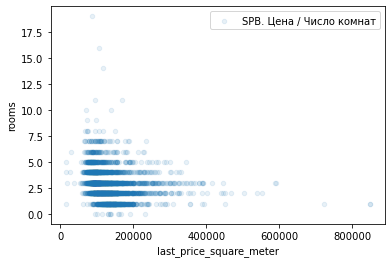

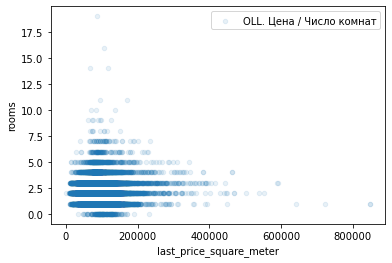

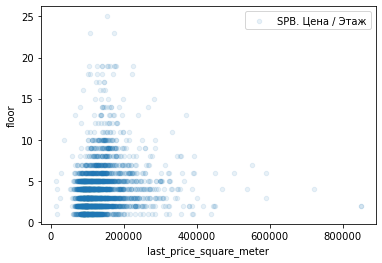

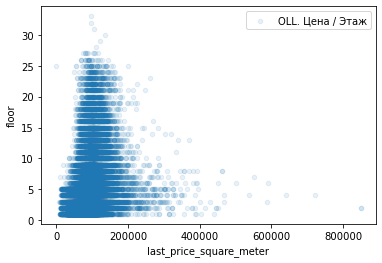

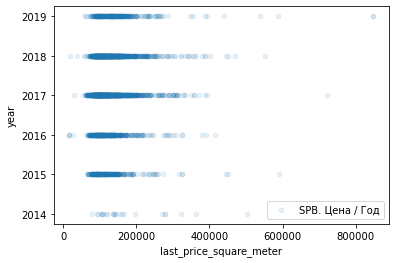

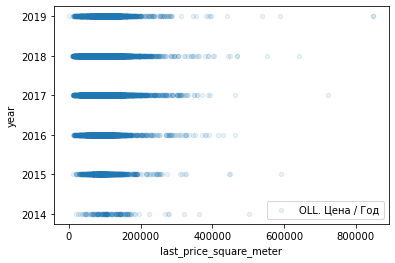

In [87]:
# Для анализа данных создадим графики, методом plot() 
# первый со значениями по центру Санкт-Петербурга,
# второй со значениями по России.

df_good_spb_center.plot(x='last_price_square_meter', y='rooms', kind='scatter',
                        label='SPB. Цена / Число комнат', alpha=0.1)
df_good.plot(x='last_price_square_meter', y='rooms', kind='scatter',
             label='OLL. Цена / Число комнат', alpha=0.1)



df_good_spb_center.plot(x='last_price_square_meter', y='floor', kind='scatter',
                        label='SPB. Цена / Этаж', alpha=0.1)
df_good.plot(x='last_price_square_meter', y='floor', kind='scatter',
             label='OLL. Цена / Этаж', alpha=0.1)



df_good_spb_center.plot(x='last_price_square_meter', y='year', kind='scatter',
                        label='SPB. Цена / Год', alpha=0.1)
df_good.plot(x='last_price_square_meter', y='year', kind='scatter',
             label='OLL. Цена / Год', alpha=0.1)

На основе сделанных таблиц и построенных графиков можно сделать вывод, что есть взаимосвязь между следующими данными:
- цена квартиры
- число комнат
- этаж
- удалённость от центра
- дата размещения объявления
- общая площадь квартиры
- высота потолков

Отсортированные данных по центру Санкт-Петербурга в среднем повторяют картину графиков для всего региона, с одной стороны это означает, что взаимосвязи в различных характеристиках действительно есть и они характерны для всего региона.

## Общий вывод

На основе обработанных данных можно сделать вывод, что действительно есть ряд факторов влияющих на стоимость недвижимости.

1. Наблюдается очевидная взаимосвязь, чем больше площадь квартиры тем выше её стоимость. В тоже время большая площадь квартиры не имеет большого влияние на один квадратный метр. Эту взаимосвязь можно изучить дополнительно, проведя дополнительное исследование.

2. Цена м/2 зависит от количества комнат, при этом самая высокая стоимость за квартиры с 3-6 комнатами.
3. Есть большая заивисимость стоимости от расстояния до цента города, чем ближе к центру тем выше цена. В то же время есть небольшой район в диапазоне 27-30км с резким скачком цены, что может свидетельствовать о наичие элитных жилых поселков в этих границах.
4. Есть взаимосвязь между ценой за м/2 и этажом, на котором продается квартира. Самая низкая стоимость на первом этаже.
5. Цены на жилье меняются в зависимости от года, при этом есть взаимосвязь: с 2014 до 2017 года цены стабильно росли, после 2017 года было небольшое падение.
6. В самом Санкт-Петербурге самая высокая цена за м/2 по сравнению с соседними регионами, ближайший по стоимости город Пушкин, это же подтверждает влияние расстояни квартиры от центра.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод